<a href="https://colab.research.google.com/github/alitourani/Iranis-dataset/blob/master/examples/metadata_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Dataset Metadata**

🎬 Dataset: [link](https://huggingface.co/datasets/alitourani/MoViFex_Dataset)


In [10]:
# Importing libraries
import json
import random
import requests
from collections import Counter

# Variables
datasetUrl = "https://huggingface.co/datasets/alitourani/MoViFex_Dataset/resolve/main"
datasetFolders = ["full_movies", "movie_shots", "movie_trailers"]
models = ["incp3", "vgg19"]

## I. Working with `stats.json`

The `json` file contains the meta-data of the dataset, which can be very useful for general tasks.

In [11]:
# Create the JSON file address
datasetMeta = datasetUrl + "/stats.json"

# Load JSON function
def loadJsonFromUrl(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes
        data = response.json()  # Parse JSON data'
        print("JSON data loaded successfully!")
        return data
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data from {url}: {e}")
        return None
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON data: {e}")
        return None

# Load the data
jsonData = loadJsonFromUrl(datasetMeta)

JSON data loaded successfully!


In [12]:
# Counting the number of movies in the dataset
def countNumberOfMovies(data):
  if data:
    moviesCount = len(data)
    print(f"The dataset contains {moviesCount} movies!")
    return moviesCount
  else:
    print("Data is empty or not loaded.")

# Run
moviesCount = countNumberOfMovies(jsonData)

The dataset contains 274 movies!


In [13]:
# Fetching a random movie from the dataset
def fetchRandomMovie(data):
  if data:
      randomMovie = random.choice(data)
      print("Randomly fetched movie:")
      print(json.dumps(randomMovie, indent=4))
      return randomMovie
  else:
      print("Data is empty or not loaded.")

# Run
randomMovie = fetchRandomMovie(jsonData)

Randomly fetched movie:
{
    "id": "0000002167",
    "title": "Blade",
    "year": 1998,
    "genres": [
        "Action",
        "Horror",
        "Thriller"
    ]
}


In [14]:
# Fetching a given movie from the dataset
def fetchMovieById(data, movieId):
    if data:
        # Standardize movieId to 10 digits
        standardizedId = f"{int(movieId):010d}"
        for movie in data:
            if movie.get('id') == standardizedId:
                print("Fetched movie by ID:")
                print(json.dumps(movie, indent=4))
                return movie
        # If no movie is found with the given ID
        print(f"No movie found with ID: {standardizedId}")
    else:
        print("Data is empty or not loaded.")

# Run
movie = fetchMovieById(jsonData, "6")

Fetched movie by ID:
{
    "id": "0000000006",
    "title": "Heat",
    "year": 1995,
    "genres": [
        "Action",
        "Crime",
        "Thriller"
    ]
}


In [15]:
# Fetching and classifying all years by count
def classifyYearsByCount(data):
    if data:
        years = [movie['year'] for movie in data if 'year' in movie]
        yearsCount = Counter(years)
        return dict(yearsCount)
    else:
        print("Data is empty or not loaded.")
        return {}

# Run
classifyYearsByCount(jsonData)

{1995: 4,
 1976: 2,
 1994: 7,
 1993: 3,
 1990: 4,
 1991: 1,
 1996: 2,
 1972: 1,
 1954: 1,
 1942: 1,
 1988: 2,
 1992: 4,
 1975: 2,
 1986: 2,
 1966: 1,
 1957: 1,
 1971: 1,
 1979: 2,
 1974: 2,
 1984: 2,
 1997: 7,
 1973: 3,
 1989: 1,
 1998: 3,
 1982: 1,
 1985: 1,
 1999: 4,
 2000: 5,
 1987: 1,
 2001: 4,
 1983: 2,
 2002: 9,
 2003: 10,
 1978: 1,
 2004: 7,
 2005: 3,
 2006: 4,
 2007: 5,
 2008: 9,
 2009: 5,
 2010: 10,
 2011: 9,
 2012: 14,
 2013: 14,
 2014: 22,
 2015: 20,
 2016: 17,
 2018: 13,
 2019: 10,
 2017: 15}

In [16]:
# Fetching movies by a single genre
def fetchMoviesByGenre(data, genre):
    matchedMovies = {}
    if data:
        matchedMovies = {movie['id']: movie for movie in data if genre in movie.get('genres', [])}
    return matchedMovies

# Run
fetchMoviesByGenre(jsonData, 'Comedy')

{'0000000231': {'id': '0000000231',
  'title': 'Dumb & Dumber (Dumb and Dumber)',
  'year': 1994,
  'genres': ['Adventure', 'Comedy']},
 '0000000296': {'id': '0000000296',
  'title': 'Pulp Fiction',
  'year': 1994,
  'genres': ['Comedy', 'Crime', 'Drama', 'Thriller']},
 '0000000356': {'id': '0000000356',
  'title': 'Forrest Gump',
  'year': 1994,
  'genres': ['Comedy', 'Drama', 'Romance', 'War']},
 '0000000420': {'id': '0000000420',
  'title': 'Beverly Hills Cop III',
  'year': 1994,
  'genres': ['Action', 'Comedy', 'Crime', 'Thriller']},
 '0000000586': {'id': '0000000586',
  'title': 'Home Alone',
  'year': 1990,
  'genres': ['Children', 'Comedy']},
 '0000000608': {'id': '0000000608',
  'title': 'Fargo',
  'year': 1996,
  'genres': ['Comedy', 'Crime', 'Drama', 'Thriller']},
 '0000000778': {'id': '0000000778',
  'title': 'Trainspotting',
  'year': 1996,
  'genres': ['Comedy', 'Crime', 'Drama']},
 '0000002011': {'id': '0000002011',
  'title': 'Back to the Future Part II',
  'year': 1989

In [17]:
# Fetch and classify movies by genres (some may have more than one genre)
def classifyMoviesByGenre(data):
    genreCounts = Counter()
    if data:
        for movie in data:
            genres = movie.get('genres', [])
            genreCounts.update(genres)
    return dict(genreCounts)

# Run
classifiedGenresDict = classifyMoviesByGenre(jsonData)
print(classifiedGenresDict)

{'Action': 142, 'Crime': 80, 'Thriller': 119, 'Mystery': 26, 'Drama': 129, 'Adventure': 56, 'IMAX': 24, 'Comedy': 29, 'Romance': 18, 'War': 18, 'Western': 10, 'Sci-Fi': 57, 'Children': 1, 'Horror': 39, 'Film-Noir': 1, 'Fantasy': 21, 'Musical': 1}


In [18]:
# Calculate the average genre per movie
def calculateAverageGenrePerMovie(classifiedGenresDict):
  if classifiedGenresDict:
    totalGenres = sum(classifiedGenresDict.values())
    averageGenrePerMovie = round(totalGenres / moviesCount, 3)
    return averageGenrePerMovie
  else:
    print("Genres dictionary is empty!")

# Run
calculateAverageGenrePerMovie(classifiedGenresDict)

2.814

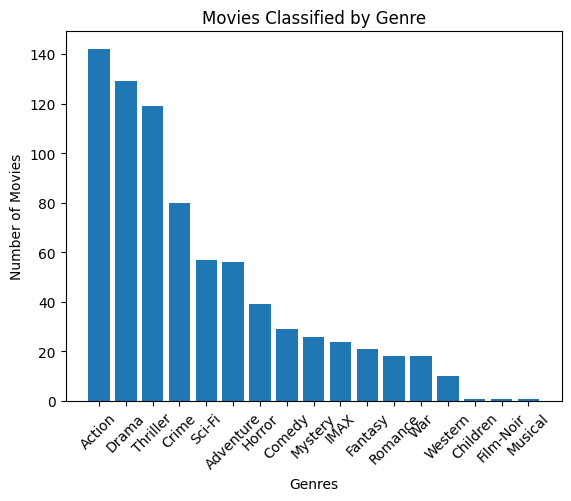

In [19]:
# Create the bar chart to visualize the Genres Dictionary
import matplotlib.pyplot as plt

def visualizeGenresDictionary(genresDict: dict):
  # Check if the dictionary is empty
  if not genresDict:
      print("Genres dictionary is empty!")
      return
  # Sort genres by count
  sortedGenres = sorted(genresDict.items(), key=lambda x: x[1], reverse=True)
  # Extract the genre names and counts
  genreNames, genreCounts = zip(*sortedGenres)
  # Create the bar chart
  plt.bar(genreNames, genreCounts)
  plt.xlabel("Genres")
  plt.ylabel("Number of Movies")
  plt.title("Movies Classified by Genre")
  # Rotate x-axis labels for better readability
  plt.xticks(rotation=45)
  # Show the plot
  plt.show()

# Run
# visualizeGenresDictionary({})
visualizeGenresDictionary(classifiedGenresDict)